In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [90]:
dp = pd.read_csv("datasets/Mall_Customers.csv")
dp.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [92]:
x = dp[['Age','Annual Income (k$)','Spending Score (1-100)']].values
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [93]:
x = dp.iloc[:,3:5].values



In [94]:
a = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++')
    kmeans.fit(x)
    a.append(kmeans.inertia_)

In [95]:
a

[269981.28,
 184131.88502788503,
 132162.13629759202,
 73880.64496247194,
 44448.45544793371,
 38814.850052563714,
 31648.55613774524,
 28456.97008144834,
 24746.748285034148,
 21882.954673688884]

Text(0, 0.5, 'Euclidean distance')

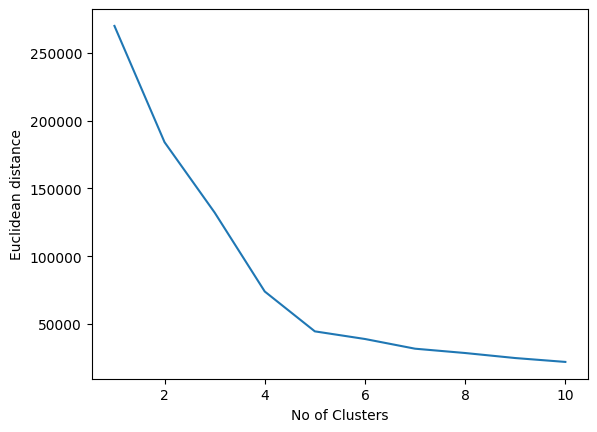

In [96]:
plt.plot(range(1,11),a)
plt.xlabel("No of Clusters")
plt.ylabel("Euclidean distance")


In [97]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [98]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [99]:
pd.concat([dp,pd.DataFrame(y_kmeans)],axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


Text(0.5, 0, 'Salary')

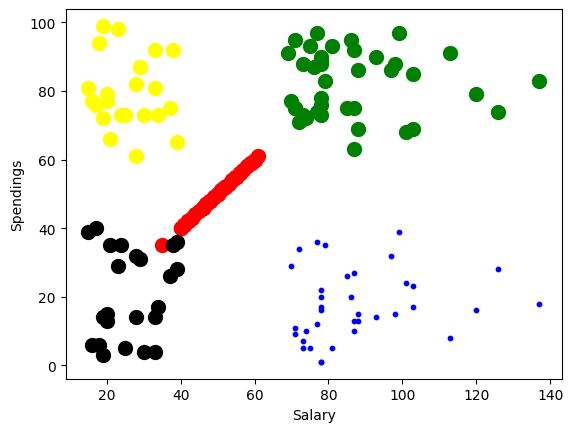

In [100]:
plt.scatter(x[y_kmeans==0,1],x[y_kmeans==0,1],s=100,c='red')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=10,c='blue')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='black')
plt.ylabel('Spendings')
plt.xlabel('Salary')